In [9]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import dateutil


In [10]:
def load_json(path:str) -> dict:
    with open(path) as f:
        data = json.load(f)
    return data

In [11]:
DATA = "../data/shaun-songs.json"

In [12]:
UTC_offset = 10

In [13]:
def pre_process(data_path, UTC_offset):    
    # load data
    songsDic = load_json(data_path)
    
    
    # Need to add unix time, currently api does this
    for song in songsDic["Items"]:
        t = dateutil.parser.parse(song["played_at"])
        song["unix_time"] = t.timestamp()
        song["played_at"] = t.strftime("%c")
    
    
    
    # Create df
    df = pd.DataFrame.from_dict(songsDic["Items"])

    # Add time information
    df['time'] = pd.to_datetime(df['unix_time'], unit="s") + pd.DateOffset(hours=UTC_offset)
    df['month'] = df['time'].dt.month
    df['weekday'] = df['time'].dt.dayofweek
    df['day_of_year'] = df['time'].dt.dayofyear
    df.set_index('time', inplace=True)
    df['hour_of_day'] = df.index.hour

    df["artist"] = [s.split("-")[-1].strip() for s in df.name]
    # need to sort so pandas doesnt break 
    df.sort_values(by="time",ascending=True, inplace=True)
    
    return df

In [14]:
df = pre_process(DATA, UTC_offset)

In [15]:
df.tail(n=2)

,user,songId,played_at,id,name,unix_time,month,weekday,day_of_year,hour_of_day,artist
time,,,,,,,,,,,
2022-01-22 16:09:28.338000059,1231014939,1e1xKKUM0bf2oTxoeV4KSd,Sat Jan 22 06:09:28 2022,09032142-a373-4962-a168-8f6d475f9f14,Cold Hearted - Zac Brown Band,1.642832e+09,1,5,22,16,Zac Brown Band
2022-01-22 16:12:36.130000114,1231014939,3tA0K5valodHMjA9bCsFtj,Sat Jan 22 06:12:36 2022,971ac489-4add-453e-8420-41ef678a342a,Beautiful Drug - Zac Brown Band,1.642832e+09,1,5,22,16,Zac Brown Band


# Artists Information 

In [16]:
artists_listend_count = df['artist'].value_counts()

In [17]:
print(f"Unique artists listend too {len(artists_listend_count)}")

Unique artists listend too 1470


## Top 15 Artists
Top 15 artists broken down by play count

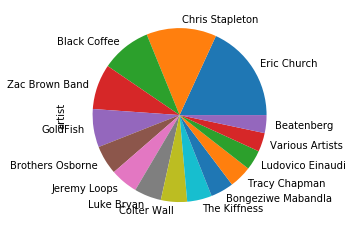

In [18]:
# https://datascienceparichay.com/article/plot-pie-chart-matplotlib/

# Need to group the less then 10 songs in a section or something

artists_listend_count.head(n=15).plot(kind='pie')

In [19]:
artists_listend_count.head(n=15)

Eric Church           343
Chris Stapleton       246
Black Coffee          176
Zac Brown Band        159
GoldFish              134
Brothers Osborne      102
Jeremy Loops           97
Luke Bryan             95
Colter Wall            92
The Kiffness           87
Bongeziwe Mabandla     81
Tracy Chapman          79
Ludovico Einaudi       70
Various Artists        66
Beatenberg             63
Name: artist, dtype: int64

## TODO Variety
Need a plt to sure variaety of music.
I'm guessing a long tail is variaty

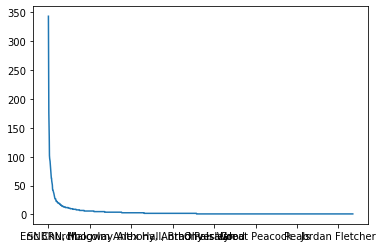

In [20]:
artists_listend_count.plot()

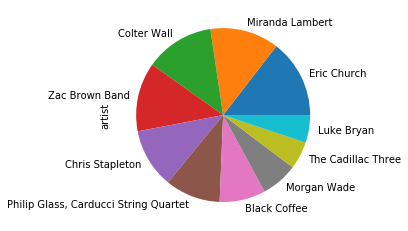

In [21]:
n = 10
df.last('1M').artist.value_counts().head(n=n).plot(kind='pie')

In [34]:
def normalise(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


In [37]:
def artist_listen_times_array(artist, key):
    # {(day,hour): count}
    daily_list_times = df[df.artist == artist].groupby([key])["hour_of_day"].value_counts().to_dict()

    listen_x = max(df[key])+1

    day_time_tuples = [ele for key in daily_list_times for ele in key]

    year_listening_times = np.zeros((24,listen_x))


    for idx in range(0,len(day_time_tuples),2):
        day, hour = day_time_tuples[idx: idx+2]
        v = daily_list_times[(day,hour)]
        year_listening_times[hour][day] = v
        
    return normalise(year_listening_times)

In [38]:
w_listening_times = artist_listen_times_array('Luke Bryan','weekday')
w_listening_times

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.25, 0.75, 0.  , 0.  ],
       [0.  , 0.5 , 0.25, 0.  , 0.25, 0.25, 0.  ],
       [0.  , 0.  , 0.5 , 0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.25],
       [0.  , 0.  , 0.25, 0.25, 0.  , 0.25, 0.5 ],
       [0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25],
       [0.  , 0.5 , 0.  , 0.  , 0.25, 0.25, 0.  ],
       [0.5 , 0.25, 0.25, 0.5 , 0.75, 0.75, 0.  ],
       [0.75, 0.  , 1.  , 0.5 , 0.25, 0.25, 0.  ],
       [0.5 , 0.25, 0.75, 0.5 , 0.75, 0.5 , 0.25],
       [0.5 , 0.75, 0.25, 0.75, 0.75, 0.5 , 0.75],
       [0.  , 0.25, 0.5 , 0.5 ,

Text(0.5, 1.0, 'Play Count over year')

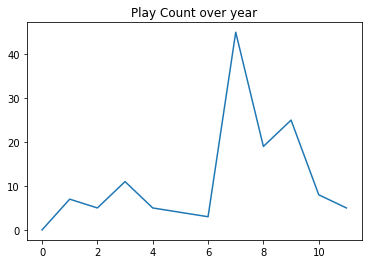

In [113]:
w_listening_times = artist_listen_times_array('GoldFish','month')
total = np.sum(w_listening_times, axis=0)#.reshape((1,12))
plt.plot(total)
plt.title("Play Count over year")

## Top Artist Jammed on The Weekend

# Songs

In [80]:
songs_listend_count = df['name'].value_counts()

In [81]:
print(f"Unique artists listend too {len(songs_listend_count)}")

Unique artists listend too 2633


In [86]:
songs_listend_count.head(n=20)

Aurora - Vocal Edit - David Scott                                  41
Never Gonna Forget (with Diplo feat. Elderbrook) - Black Coffee    38
That’s Damn Rock & Roll - Eric Church                              38
Starlight - Jon Pardi                                              32
Up Down (feat. Florida Georgia Line) - Morgan Wallen               31
Sleeve - Nate Smith                                                28
Glad To Be Here (feat. Brent Cobb) - Hailey Whitters               28
A Change Is Gonna Come - Los Coast                                 26
Hell Of A View - Eric Church                                       23
Hatin' Somebody - Brothers Osborne                                 23
Don't Cry - Morgan Wade                                            23
Nomi - The Kiffness                                                23
Know Some - Vandelux                                               23
Uwrongo - Edit - Various Artists                                   23
Don't Blink - Fancy 

song count and when it was played, maybe take the top 100 songs and get weekly play count 

song listened to weekly, monthly

## Listening times during the day

In [78]:
week_songs = df.last('7D').weekday.value_counts().to_dict()
month_songs = df.last('1M').weekday.value_counts().to_dict()

<BarContainer object of 7 artists>

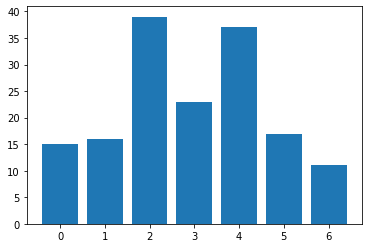

In [79]:
days = month_songs.keys()
song_count = month_songs.values()

plt.bar(days, song_count)

In [23]:
day_listening_times = df["hour_of_day"].value_counts().to_dict()

In [24]:
song_count_hours = np.zeros(24)
for k,v in day_listening_times.items():
    song_count_hours[k] = v

In [25]:
norm = np.linalg.norm(song_count_hours)

In [26]:
normaled = song_count_hours/norm

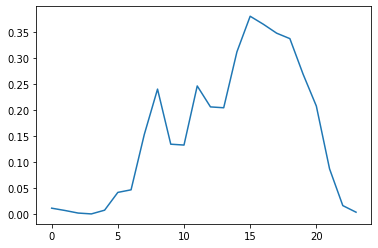

In [27]:
plt.plot(range(24), normaled)

In [28]:
def listen_times_array(key):
    # {(day,hour): count}
    daily_list_times = df.groupby([key])["hour_of_day"].value_counts().to_dict()

    listen_x = max(df[key])+1

    day_time_tuples = [ele for key in daily_list_times for ele in key]

    year_listening_times = np.zeros((24,listen_x))


    for idx in range(0,len(day_time_tuples),2):
        day, hour = day_time_tuples[idx: idx+2]
        v = daily_list_times[(day,hour)]
        year_listening_times[hour][day] = v
        
    return year_listening_times

In [29]:
daily_listening_times = listen_times_array('day_of_year')
plt.imshow(daily_listening_times)

In [31]:
monthly_listening_times = listen_times_array('month')
plt.imshow(monthly_listening_times)

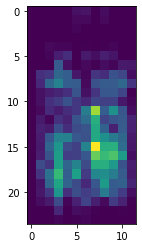

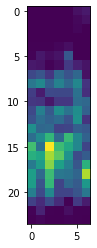

In [33]:
w_listening_times = listen_times_array('weekday')
plt.imshow(w_listening_times)